Challenge Set 3  
Topic:        Explore Movie Data  
Date:         07/19/2016  
Name:         Avi Grunwald  
Worked with:  

In [11]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from patsy import dmatrices
from sklearn.linear_model import LinearRegression

pd.set_option('display.mpl_style', 'default')
pd.set_option('display.float_format', lambda x: '%.2f' % x)
%matplotlib inline

/home/avi/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2885: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
data_start = pd.read_csv('../movies_list_all_df.csv', index_col=0)
movie_data = pd.read_csv('/home/avi/Documents/metis/ds/metisgh/nyc16_ds8/challenges/challenges_data/2013_movies.csv')

In [4]:
data_start['rdm'] = data_start['Release Date'].apply(lambda x: datetime.strptime(x, '%B %d, %Y').strftime('%B'))
data_start['rdy'] = data_start['Release Date'].apply(lambda x: datetime.strptime(x, '%B %d, %Y').strftime('%Y'))
data_start['Release Date'] = data_start['Release Date'].apply(lambda x: datetime.strptime(x, '%B %d, %Y'))
# data_start['rd'] = pd.to_datetime(data_start.rd)

data_start['Domestic Total Gross'] = data_start['Domestic Total Gross'].apply(lambda x: int(''.join([i for i in x if i.isnumeric()])))
data_start['Opening Weekend Gross'] = data_start['Opening Weekend Gross'].apply(lambda x: int(''.join([i for i in x if i.isnumeric()])))

data_start['Runtime'].fillna(value='0 hrs. 0 min.', inplace=True)
data_start['Runtime'] = data_start['Runtime'].str.replace(' min.', '').str.split(' hrs. ').apply(lambda x: int(x[0]) * 60 + int(x[1]))
data_start = data_start[data_start['Runtime']!=0]

In [5]:
data_start.columns = [ 'title', 'dtg', 'dist', 'rd', 'run', 'rating', 'pb', 'owg', 'owt', 'act', 'series', 'rdm', 'rdy']
data_start.head()

,title,dtg,dist,rd,run,rating,pb,owg,owt,act,series,rdm,rdy
0,Star Wars: The Force Awakens,936662225,Buena Vista,2015-12-18,136,PG-13,$245 million,247966675,"4,134",15,Yes,December,2015
1,Marvel's The Avengers,623357910,Buena Vista,2012-05-04,142,PG-13,$220 million,207438708,"4,349",13,Yes,May,2012
2,Jurassic World,652270625,Universal,2015-06-12,124,PG-13,$150 million,208806270,"4,274",7,Yes,June,2015
3,Avengers: Age of Ultron,459005868,Buena Vista,2015-05-01,141,PG-13,$250 million,191271109,"4,276",19,Yes,May,2015
4,The Dark Knight,533345358,Warner Bros.,2008-07-18,150,PG-13,$185 million,158411483,"4,366",11,Yes,July,2008


**Challenge 1**

In [6]:
data_start.describe()

,dtg,run,owg,act
count,4662.00,4662.00,4662.00,4662.00
mean,49654769.06,106.66,13250519.78,3.39
std,64164326.94,17.99,18445315.52,3.05
min,131357.00,44.00,96076.00,0.00
25%,12720194.00,95.00,3607208.00,1.00
50%,28577830.00,104.00,7217190.50,3.00
75%,60058878.50,116.00,15165165.00,5.00
max,936662225.00,229.00,247966675.00,27.00


In [20]:
ones = np.ones((4662,1))

In [41]:
sm_model = sm.OLS(data_start.dtg, ones)
sm_results = sm_model.fit()
sm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    dtg   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                      -inf
Date:                Tue, 19 Jul 2016   Prob (F-statistic):                nan
Time:                        17:52:34   Log-Likelihood:                -90423.
No. Observations:                4662   AIC:                         1.808e+05
Df Residuals:                    4661   BIC:                         1.809e+05
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       4.965e+07    9.4e+05     52.839      0.000      4.78e+07  5.15e+07
==============================================================================
Omnibus:                     3717.185   Durbin-Watson:                   0.374
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           107721.900
Skew:                           3.627   Prob(JB):                         0.00
Kurtosis:                      25.404   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [122]:
X = ones
y = data_start.dtg

In [123]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)
model.score(X, y)
predictions = model.predict(X)

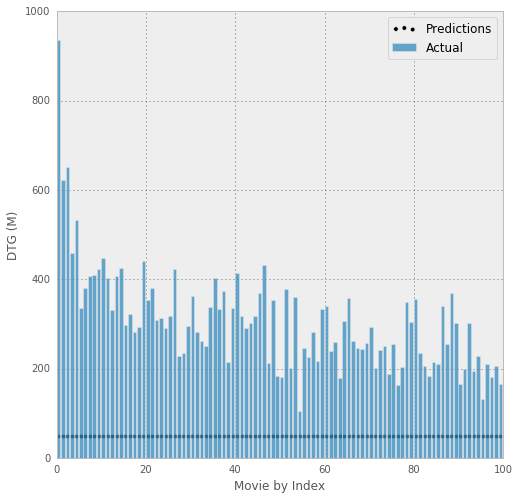

In [124]:
plt.figure(figsize=(8,8))
plt.bar(range(100), y[:100]/1000000, alpha=.75, label='Actual')
plt.scatter(np.array(range(100))+.4, predictions[:100]/1000000, c='black', label='Predictions')
plt.legend()
plt.ylim(ymin=0)
plt.xlim(xmin=0, xmax=100)
plt.xlabel('Movie by Index')
plt.ylabel('DTG (M)')
plt.show()

The above model does not have any fluctuation and consistently predicts the same thing for every movie.

In [125]:
residuals = (y - model.predict(X))

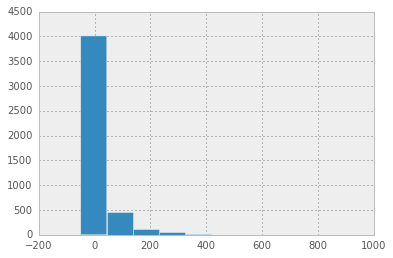

In [126]:
plt.hist(residuals/1000000)
plt.show()

The residuals are right skewed.

Stats Models Residuals Below

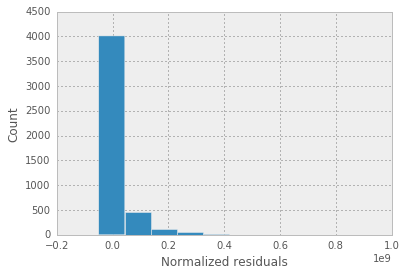

In [52]:
plt.hist(sm_results.resid)
plt.ylabel('Count')
plt.xlabel('Normalized residuals')
plt.show()

**Challenge 2**

In [127]:
nums = np.arange(4662)
ones2 = np.full((4662), 1)
y = data_start.dtg
df1 = pd.DataFrame({'y': y, 'x1':ones2, 'x2': nums})
df1.head()

/home/avi/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:294: FutureWarning: in the future, full(4662, 1) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


,x1,x2,y
0,1.00,0,936662225
1,1.00,1,623357910
2,1.00,2,652270625
3,1.00,3,459005868
4,1.00,4,533345358


In [8]:
# y = pd.DataFrame(y)

In [128]:
y, X = dmatrices('y ~ x1 + x2', data=df1, return_type='dataframe')

In [129]:
model2 = LinearRegression()
model2.fit(X, y)
model2.score(X, y)
predictions = model2.predict(X)

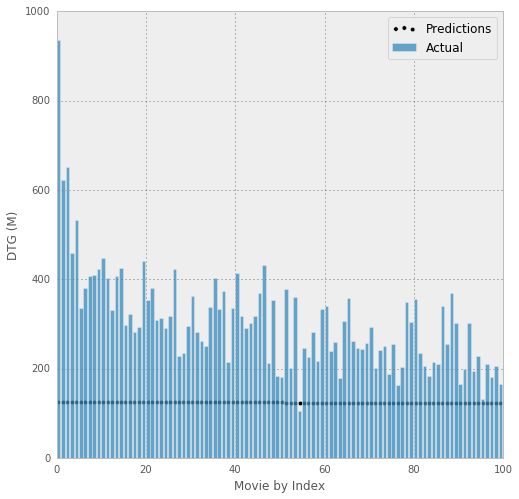

In [130]:
plt.figure(figsize=(8,8))
plt.bar(range(100), y.y[:100]/1000000, alpha=.75, label='Actual')
plt.scatter(np.array(range(100))+.4, predictions[:100]/1000000, c='black', label='Predictions')
plt.legend()
plt.ylim(ymin=0)
plt.xlim(xmin=0, xmax=100)
plt.xlabel('Movie by Index')
plt.ylabel('DTG (M)')
plt.show()

In [65]:
residuals = (y - predictions)

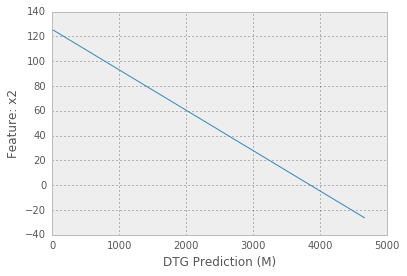

In [74]:
plt.plot(X.x2, predictions/1000000)
plt.ylabel('Feature: x2')
plt.xlabel('DTG Prediction (M)')
plt.show()

Top grossing got number 0, second 1, third 2, etc. hence declining prediction with higher x2 value.

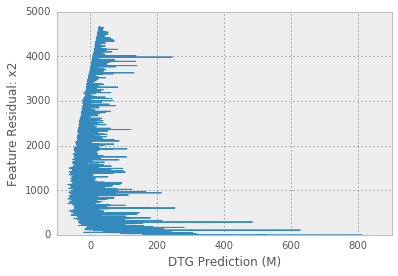

In [73]:
plt.plot(residuals/1000000, X.x2)
plt.ylabel('Feature Residual: x2')
plt.xlabel('DTG Prediction (M)')
plt.show()

**Challenge 3**

In [131]:
df1['rdm'] = data_start.rdm

In [132]:
y, X = dmatrices('y ~ x1 + x2 + rdm', data=df1, return_type='dataframe')

In [133]:
model2 = LinearRegression()
model2.fit(X, y)
model2.score(X, y)
predictions = model2.predict(X)

In [134]:
X.head()

,Intercept,rdm[T.August],rdm[T.December],rdm[T.February],rdm[T.January],rdm[T.July],rdm[T.June],rdm[T.March],rdm[T.May],rdm[T.November],rdm[T.October],rdm[T.September],x1,x2
0,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
1,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00
2,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,2.00
3,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,3.00
4,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,4.00


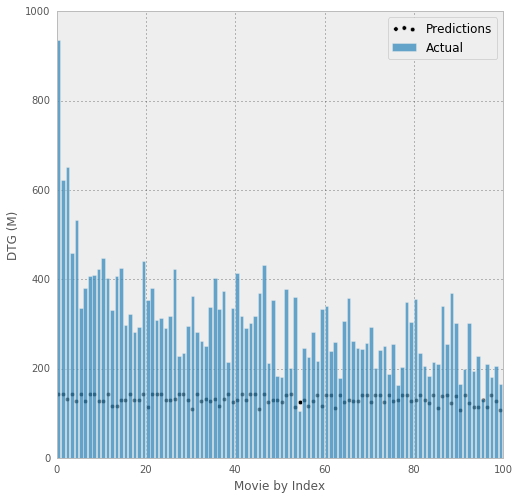

In [135]:
plt.figure(figsize=(8,8))
plt.bar(range(100), y.y[:100]/1000000, alpha=.75, label='Actual')
plt.scatter(np.array(range(100))+.4, predictions[:100]/1000000, c='black', label='Predictions')
plt.legend()
plt.ylim(ymin=0)
plt.xlim(xmin=0, xmax=100)
plt.xlabel('Movie by Index')
plt.ylabel('DTG (M)')
plt.show()

In [84]:
residuals = (y - predictions)

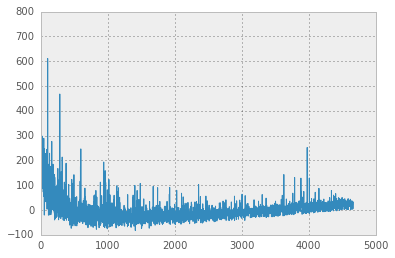

In [85]:
plt.plot(residuals/1000000)
plt.show()

It is converting a categorical into numerical by making each into its own column and associating it with 0 or 1.

**Challenge 4**

In [136]:
y, X = dmatrices('dtg ~ series + rdm + owt', data=data_start, return_type='dataframe')

In [137]:
model2 = LinearRegression()
model2.fit(X, y)
model2.score(X, y)
predictions = model2.predict(X)

In [104]:
X.head()

,Intercept,series[T.Yes],rdm[T.August],rdm[T.December],rdm[T.February],rdm[T.January],rdm[T.July],rdm[T.June],rdm[T.March],rdm[T.May],...,owt[T.987],owt[T.988],owt[T.989],owt[T.990],owt[T.991],owt[T.992],owt[T.993],owt[T.994],owt[T.995],owt[T.996]
0,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


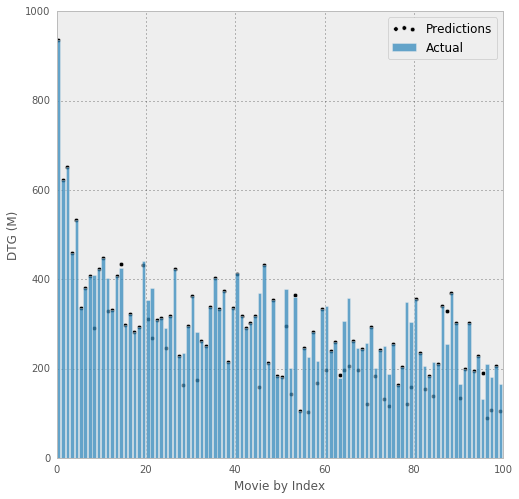

In [138]:
plt.figure(figsize=(8,8))
plt.bar(range(100), y.dtg[:100]/1000000, alpha=.75, label='Actual')
plt.scatter(np.array(range(100))+.4, predictions[:100]/1000000, c='black', label='Predictions')
plt.legend()
plt.ylim(ymin=0)
plt.xlim(xmin=0, xmax=100)
plt.xlabel('Movie by Index')
plt.ylabel('DTG (M)')
plt.show()

In [106]:
residuals = (y - predictions)

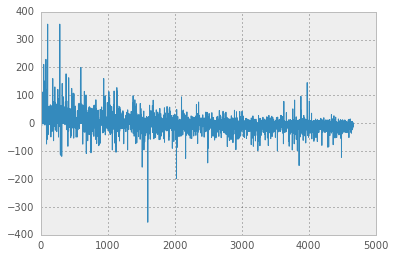

In [107]:
plt.plot(residuals/1000000)
plt.show()

In [87]:
data_start.head()

,title,dtg,dist,rd,run,rating,pb,owg,owt,act,series,rdm,rdy
0,Star Wars: The Force Awakens,936662225,Buena Vista,2015-12-18,136,PG-13,$245 million,247966675,"4,134",15,Yes,December,2015
1,Marvel's The Avengers,623357910,Buena Vista,2012-05-04,142,PG-13,$220 million,207438708,"4,349",13,Yes,May,2012
2,Jurassic World,652270625,Universal,2015-06-12,124,PG-13,$150 million,208806270,"4,274",7,Yes,June,2015
3,Avengers: Age of Ultron,459005868,Buena Vista,2015-05-01,141,PG-13,$250 million,191271109,"4,276",19,Yes,May,2015
4,The Dark Knight,533345358,Warner Bros.,2008-07-18,150,PG-13,$185 million,158411483,"4,366",11,Yes,July,2008


**Challenge 5**

In [139]:
from sklearn import cross_validation as cv
x_train, x_test, y_train, y_test = cv.train_test_split(X,y,test_size=0.25,random_state=1234)
model = LinearRegression().fit(x_train, y_train)

In [140]:
predictions = model2.predict(x_test)

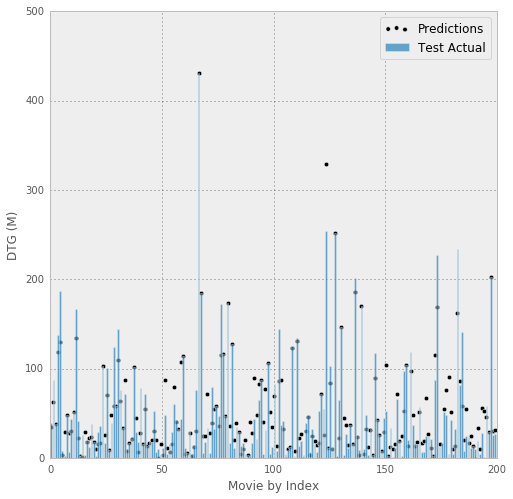

In [141]:
plt.figure(figsize=(8,8))
plt.bar(range(200), y_test.dtg[:200]/1000000, alpha=.75, label='Test Actual')
plt.scatter(np.array(range(200))+.4, predictions[:200]/1000000, c='black', label='Predictions')
plt.legend()
plt.ylim(ymin=0)
plt.xlim(xmin=0, xmax=200)
plt.xlabel('Movie by Index')
plt.ylabel('DTG (M)')
plt.show()